# **LITERATURE REVIEW KEYWORDS-BASED**
---
### D'Andrea Luca
Python Driving License - June 2023

## Summary

The provided script is designed to retrieve scientific papers from a database (i.e. Scopus). It enables users to apply diverse keyword filters and optionally restrict results based on the publication year. The extracted information, including titles and publication years, can be exported to a txt file. Additionally, the script generates a graph illustrating the research findings.

The aim of this script is twofold:

i) Highlight the significance of the multidisciplinary approach in the application of Bone Tissue Engineering.

ii) Conduct a comprehensive review of composite ceramic scaffolds.

## Part 1
Import of the database. The initial database has been created starting from two keywords: "glass scaffold" and "ceramic scaffold".


In [ ]:
# import of the initial database from the drive folder
from google.colab import drive
drive.mount('/content/drive')

# change directory
%cd /content/drive/MyDrive/Colab Notebooks

# Check the files in the working folder
#%ls

# import of the python libraries
import numpy  as np
import pandas as pd

# be sure the file exists in the current directory
filename = 'scopus.xlsx'
#filename = 'linda.xlsx'

data = pd.read_excel(filename)

dimensioni = np.shape(data)

# check the dimensions of the database
print(f'The initial number of papers is {dimensioni[0]}')

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks
The initial number of papers is 8057


## Part 2
The user select the keywords and apply a filter year-based. For each combination a file with the name of the keywords is written.

The user can add/remove keywords as long as the variable strings is updated.

Modify line 21 to apply the filter year-based

Uncommet line 76 if you want to display the number of combination

Uncommet line 97 if you want to display the title of the paper

0
('composite', 'composite')
Number of paper for this combination: 539
2023 Hierarchically porous bioceramics based on geopolymer-hydroxyapatite composite as a novel biomaterial: Structure, mechanical properties and biocompatibility evaluation
2023 3D Bioprinting of a Bioactive Composite Scaffold for Cell Delivery in Periodontal Tissue Regeneration
2023 Design and characterization of Poly(glycerol sebacate)/Poly(3-hydroxybutyrate)/bioglass/curcumin nanocomposite scaffold for wound healing application
2023 Functional bioglass/carbon nanocomposite scaffolds from vat photopolymerization of a novel preceramic polymer-based nanoemulsion
2023 Sintering densification mechanism and mechanical properties of the 3D-printed high-melting-point-difference magnesium oxide/calcium phosphate composite bio-ceramic scaffold
2023 Strong and tough magnesium-MAX phase composites with nacre-like lamellar and brick-and-mortar architectures
2023 Liquid-Phase Approach to Glass-Microfiber-Reinforced Sulfide Sol

<ipython-input-9-a83b2c5e871b>:109: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Number of paper for this combination: 4
2022 Fabrication, characterization, and in vitro evaluation of β-TCP/ZrO2-phosphate-based bioactive glass scaffolds for bone repair; [Fabricación, caracterización y evaluación in vitro de andamios de β-TCP/ZrO2-vidrio bioactivo a base de fosfato para la reparación ósea]
2022 Biocomposites and Bioceramics in Tissue Engineering: Beyond the Next Decade
2020 Effect of zirconia-mullite incorporated biphasic calcium phosphate/biopolymer composite scaffolds for bone tissue engineering
2020 Modification of surfaces of alumina-zirconia porous ceramics with Sr2+ after SBF
22
('silic', 'silic')
Number of paper for this combination: 156
2024 Biomimetic porous silicon oxycarbide ceramics with improved specific strength and efficient thermal insulation
2023 An insight into the thermal processability of highly bioactive borosilicate glasses through kinetic approach
2023 Preparation of biosilica glass-based porous scaffolds using various elements (Mg–Zn, Mg–Cu, 

Text(0.5, 1.0, 'Glass and Ceramic Scaffolds')

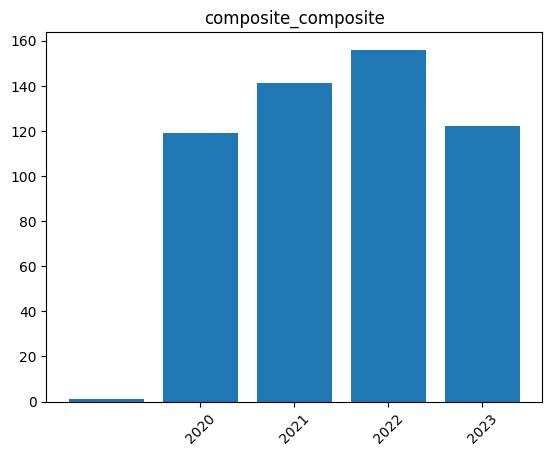

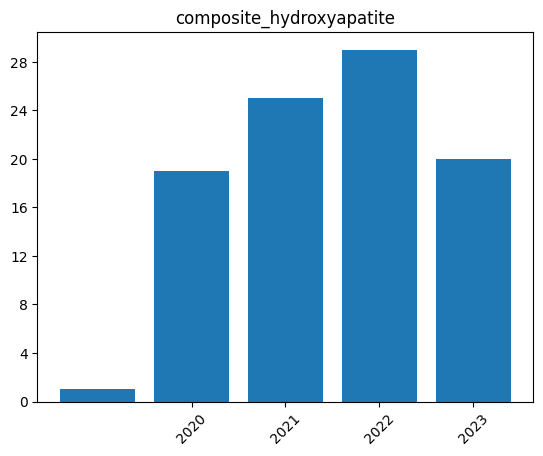

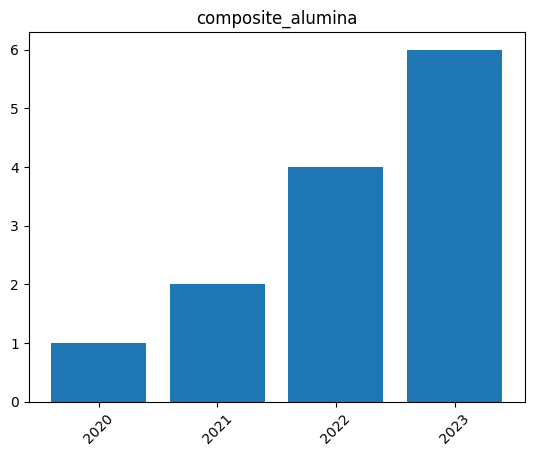

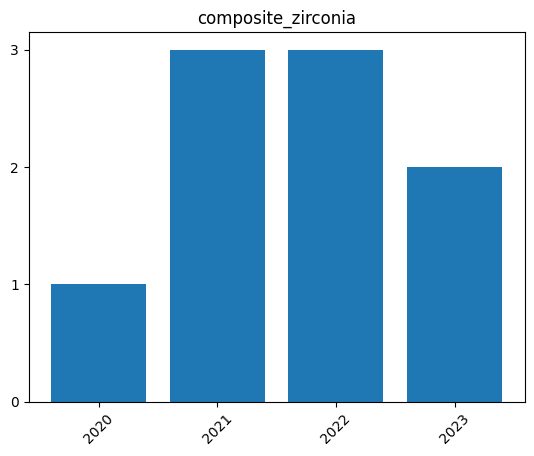

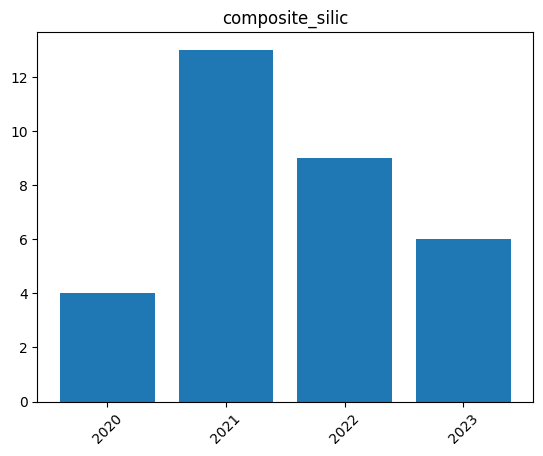

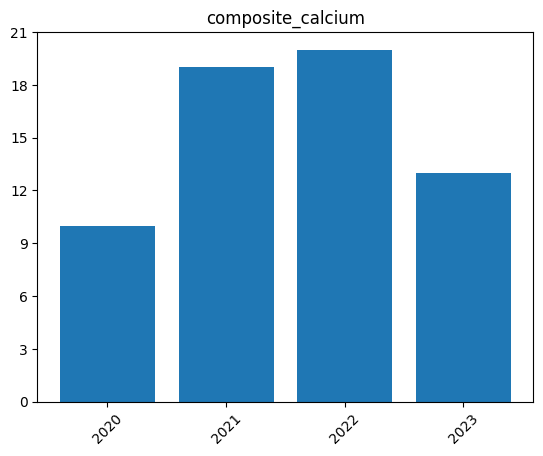

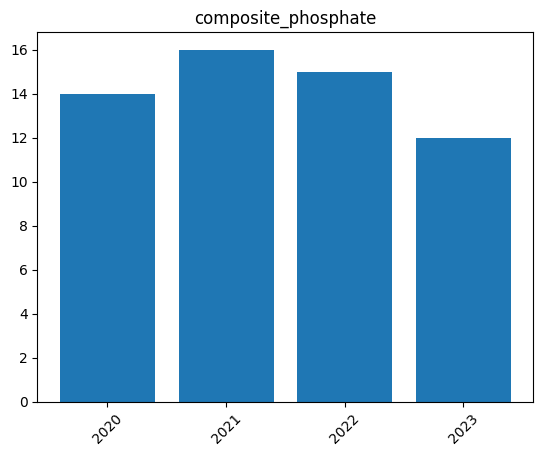

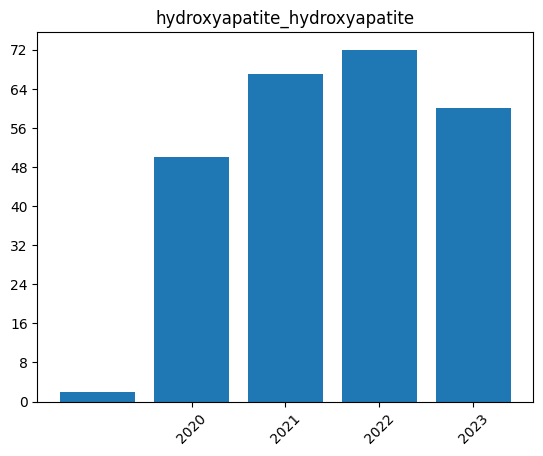

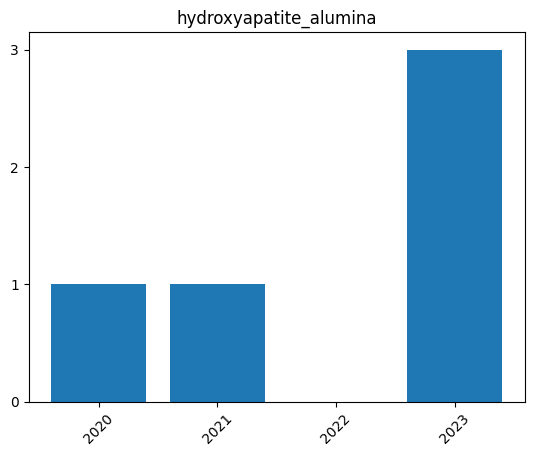

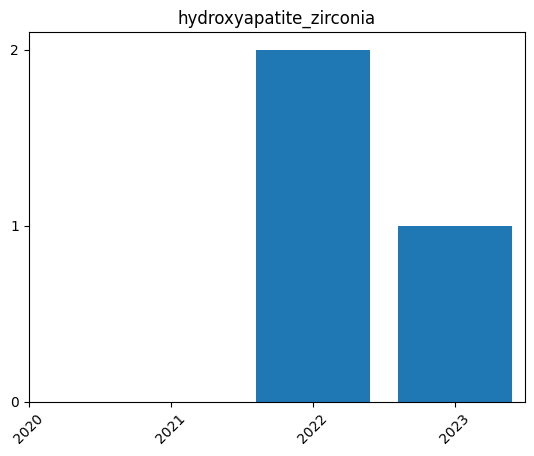

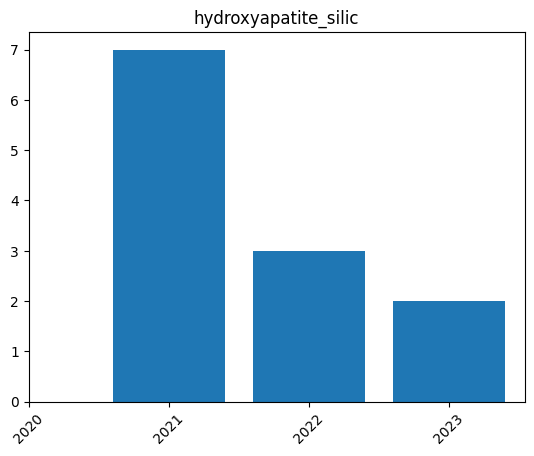

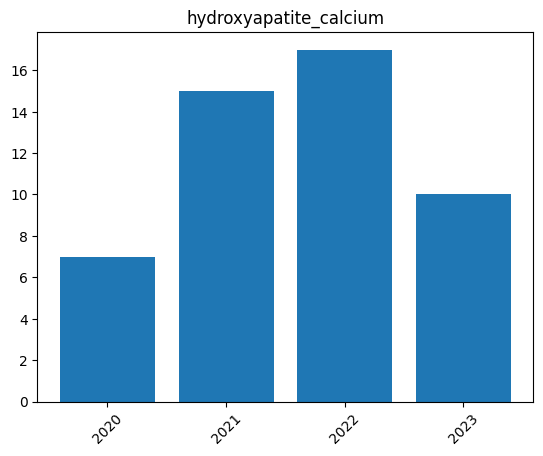

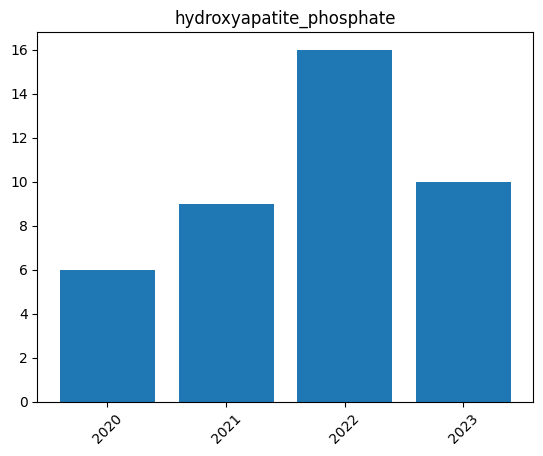

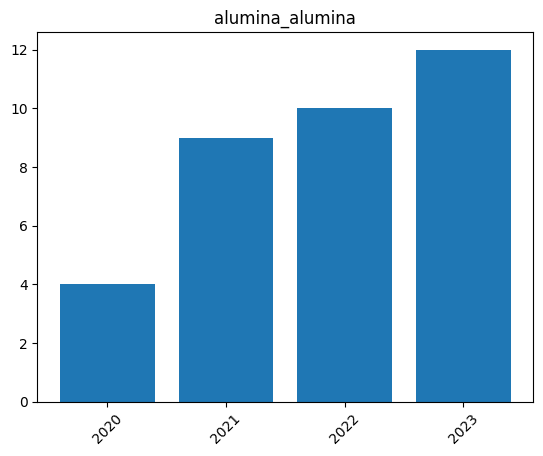

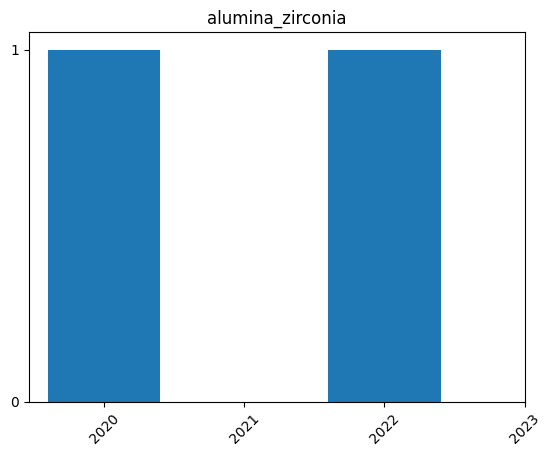

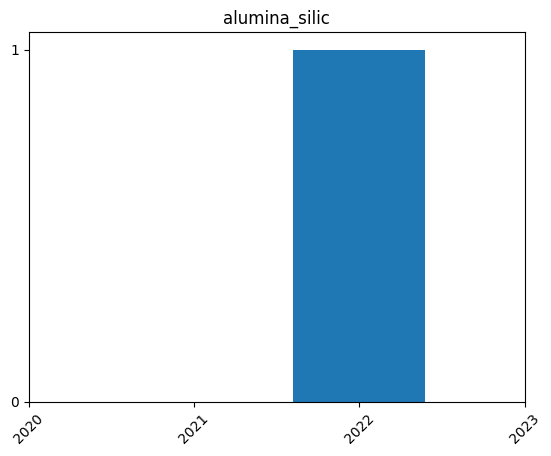

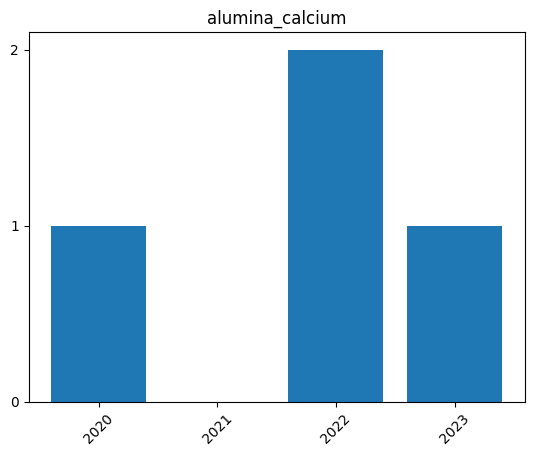

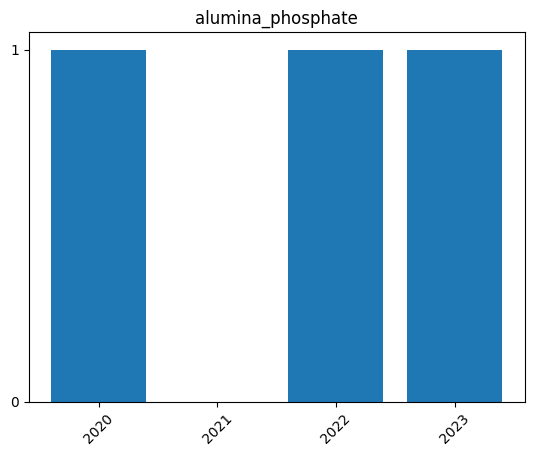

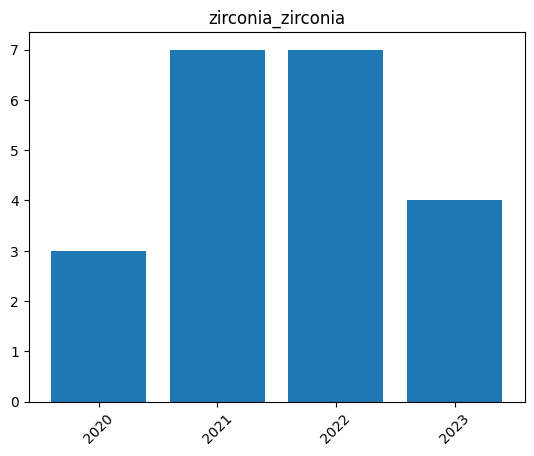

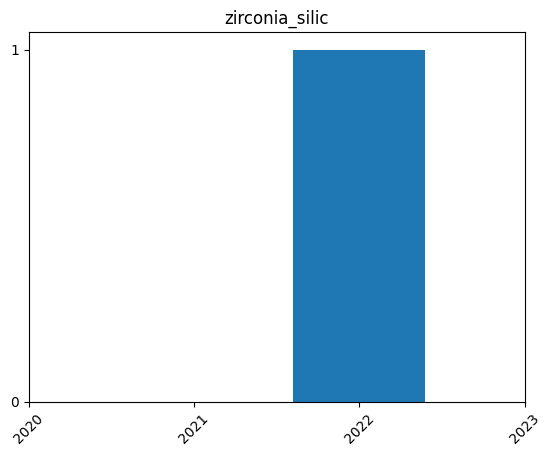

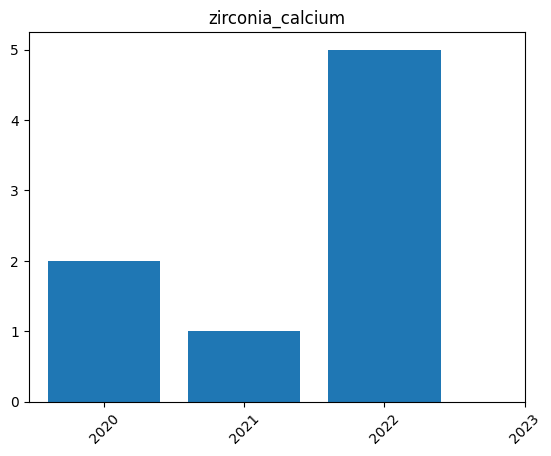

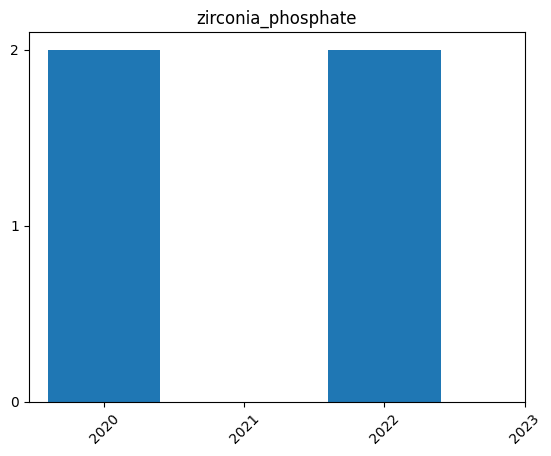

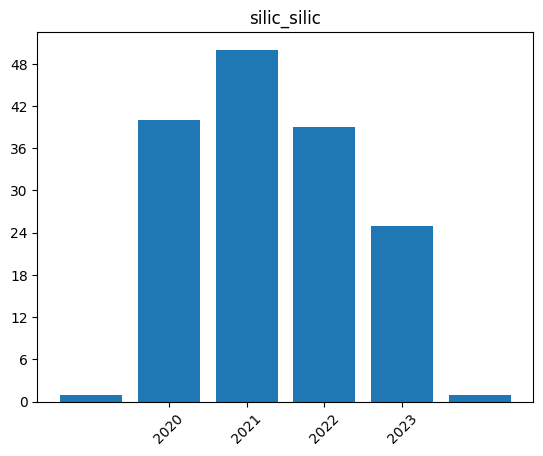

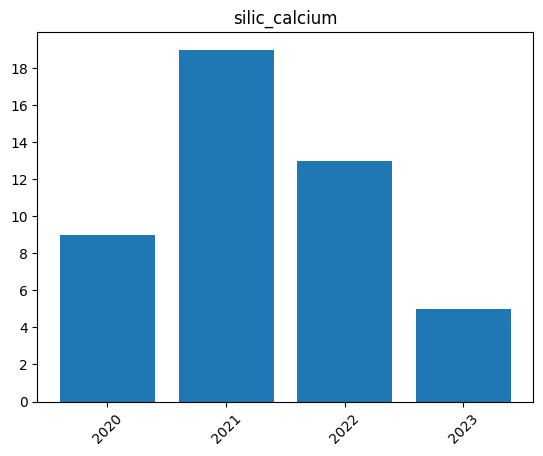

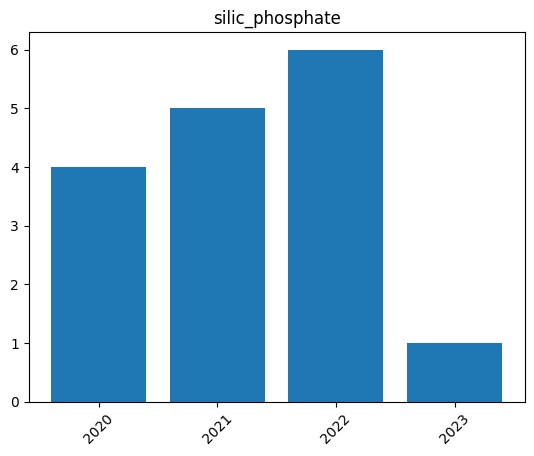

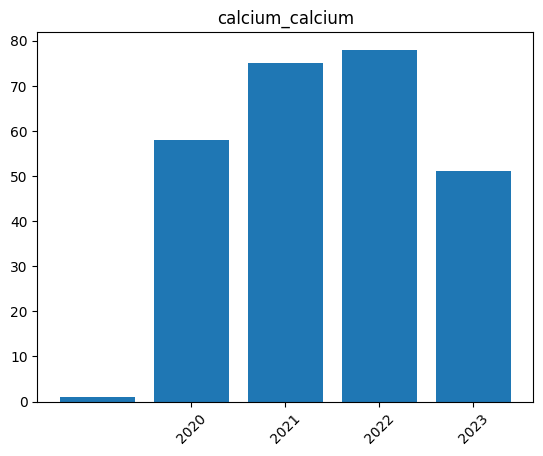

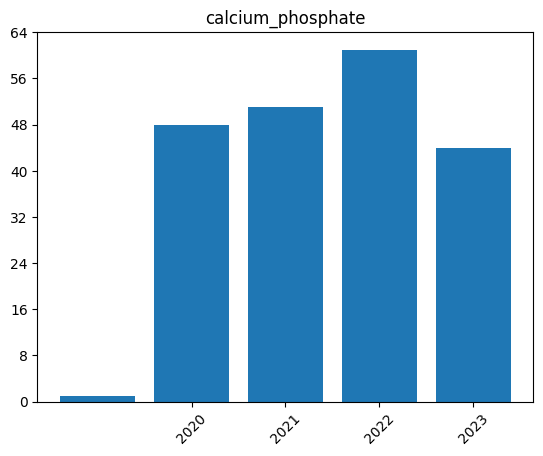

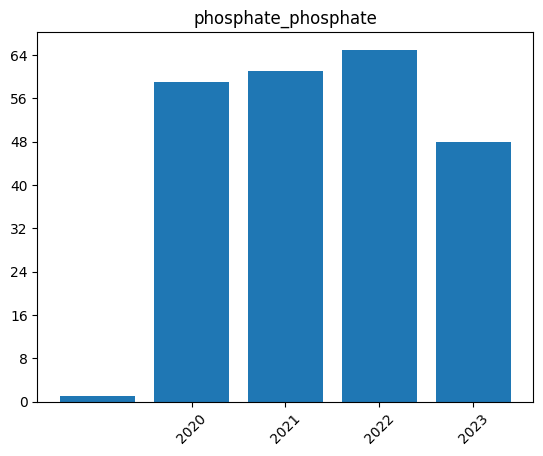

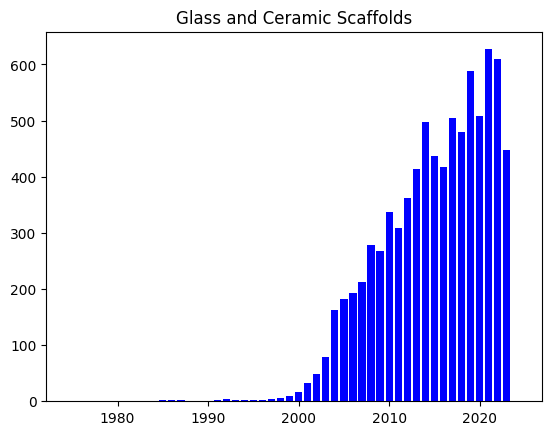

In [ ]:
from itertools import combinations_with_replacement as comb
from collections import Counter
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import math
import numpy  as np
import pandas as pd

# the user can add or remove the keywords. If so, update the variable strings
# insert the keywords: 'mech', 'biol', 'mech', 'finite element'
par1 = 'composite'
par2 = 'hydroxyapatite'
par3 = 'alumina'
par4 = 'zirconia'
par5 = 'silic'
par6 = 'calcium'
par7 = 'phosphate'
#par8 = 'vitro'
#par9 = 'mech'
#par10 = 'computational'
i3 = 2020

strings = [par1, par2, par3, par4, par5, par6, par7]#, par8, par9, par10]

# Generate combinations
comb_list = list(comb(strings, 2))
taglia = np.shape(comb_list)
taglia2 = taglia[0]
vector_data = []
annov = []


# Convert the combinations into a matrix of strings
matrix_of_strings = [list(combo) for combo in comb_list]

# Print the combinations
for combo2 in range(taglia2):
    print(combo2)

    pat0 = comb_list[combo2]
    print(pat0)
    pat1 = pat0[0]
    pat2 = pat0[1]

    howmany = 0

    df = pd.DataFrame(data)
    dime = np.shape(data)

    annostr = data['Year']
    annostr2 = annostr[1:]
    titlestr = data['Title']
    titlestr2 = titlestr[1:]

    annonum = [int(element) for element in annostr2]
    linelist = []

    for line in range(dime[0]-1):
        i1 = 0
        i2 = 0
        for col in range(dime[1]):
            TF1 = pat1.lower() in str(df.iloc[line, col]).lower()
            TF2 = pat2.lower() in str(df.iloc[line, col]).lower()

            # Boolean operator
            if TF1:
                i1 = 1
            if TF2:
                i2 = 1

        if i1 == 1 and i2 == 1 and annonum[line]>= i3:
            howmany += 1
            linelist.append(line)

    # uncomment display the number of combination
    print(f'Number of paper for this combination: {howmany}')
    vector_data.append(howmany)


    ### Stampo la posizione dei vettori
    ### print(f'linelist: {linelist}')

    file_path = pat1 + "_" + pat2 + ".txt"

    annov = [0] * howmany
    with open(file_path, 'a') as file:
      for ii in range(howmany):
        tt = linelist[ii]
        titolo = data['Title'].iloc[tt]
        anno = data['Year'].iloc[tt]
        annov[ii] = anno
        titolist = titolo.split()

        matrix = str(anno) + " " + titolo

        # uncomment to print the names of the papers
        print(matrix)

        # uncomment to write the txt files
        #file.write(matrix + '\n')

    if howmany > 0:
        year_counts = Counter(annov)
        # Convert the Counter to a dictionary if needed
        year_counts_dict = dict(year_counts)
        # Extract the items and their counts from the counter
        items, counts = zip(*year_counts.items())
        # Create a bar plot for the counter variable
        plt.figure()
        plt.title(pat1 + "_" + pat2)
        plt.bar(items, counts)
        integer_ticks = np.arange(i3, 2024, 1)  # Adjust the range and step as needed
        plt.xticks(integer_ticks)
        # Rotate the y-axis labels to display them diagonally
        plt.xticks(rotation=45)

        # rescaling of the y-axis
        ax = plt.gca()
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))


# Print the bars of all papers
year_counts2 = Counter(data['Year'])
### Convert the Counter to a dictionary if needed
###year_counts_dict2 = dict(year_counts2)
# Extract the items and their counts from the counter
items2, counts2 = zip(*year_counts2.items())


# Create a bar plot for the counter variable
# Uncomment to show the bar plots
plt.figure()
plt.bar(items2, counts2, label='First Bar Plot', color='b')
plt.title("Glass and Ceramic Scaffolds")

## Part 3
Since the analyzed problem is characterized by a multidisciplinary approach, a matrix helps to visualize the multidisciplinarity of the problem.

The graph represents the numeber of studies that couple at least two research fields. On the main diagonal, the individual keywords are represented. Out of the diagonal, the combination between two keywords. As defined, the matrix is symmetric.

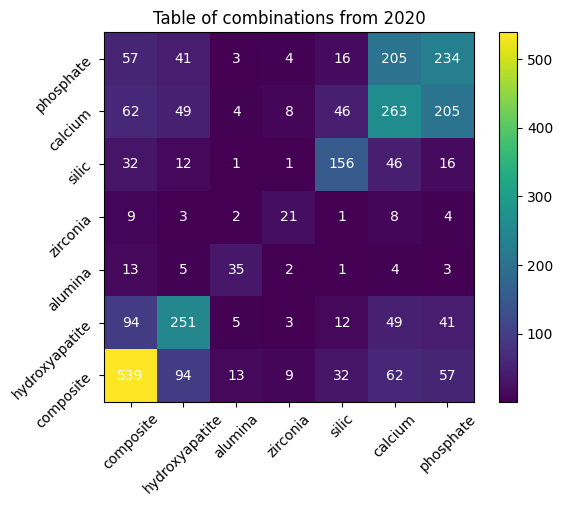

You have to read 667 papers. Maybe less!


In [ ]:
import matplotlib.pyplot as plt
import math

# Data from previous section
# Calculate the size of the square matrix

SS = np.shape(vector_data)

# Transform the tuple into number
concatenated_string = ''.join(map(str, SS))
S = int(concatenated_string)

# Function to compute the number of terms (n) given a sum (S)
def inverse_gaussian_sum(S):
    n = (-1 + math.sqrt(1 + 8 * S))/2
    return int(n)

n = inverse_gaussian_sum(S)
# Create a symmetric matrix from the vector
symmetric_matrix = np.zeros((n, n))
k = 0
for i in range(n):
    for j in range(i, n):
        symmetric_matrix[i, j] = vector_data[k]
        symmetric_matrix[j, i] = symmetric_matrix[i, j]
        k += 1

# Create a 2D histogram
plt.imshow(symmetric_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()

# Display the values in the middle of each box
for i in range(len(strings)):
    for j in range(len(strings)):
        plt.text(j, i, str(int(symmetric_matrix[i, j])), ha='center', va='center', color='white')

# Set row and column labels
plt.xticks(np.arange(len(strings)), strings)
plt.yticks(np.arange(len(strings)), strings)

# plot labels in vertical axis from bottom to top
plt.gca().invert_yaxis()

# Rotate the y-axis labels to display them diagonally
plt.xticks(rotation=45)
plt.yticks(rotation=45)

titolo_graf = 'Table of combinations from ' + str(i3)
plt.title(titolo_graf)

# Show the plot
plt.show()

# Calculate the sum of the upper triangular part excluding the main diagonal
upper_sum = np.sum(np.triu(symmetric_matrix, k=1))

print(f"You have to read {int(upper_sum)} papers. Maybe less!")
